Column	Meaning
   1. cc	- Internal record or case counter used by the system. Sometimes used for classification or internal tracking.
   2. Date Rptd	- The date when the crime was reported to the police.
   3. DATE OCC	The actual date when the crime occurred.
   4. TIME OCC	Time the crime occurred (24-hour format, e.g., 2130 = 9:30 PM).
   5. AREA	Numeric code representing a police division or patrol area.
   6. AREA NAME	Name of the police area or division.
   7. Rpt Dist No	Reporting district number within the police area. Used for detailed geographic policing.
   8. Part 1-2	Crime classification based on FBI system: Part 1 = serious crimes, Part 2 = less serious offenses.
   9. Crm Cd	Numeric code assigned to the type of crime.
   10. Crm Cd Desc	Text description of the crime (e.g., robbery, burglary, assault).
   11. Mocodes	Modus Operandi codes – how the crime was committed (methods used by offender). Multiple codes can appear.
   12. Vict Age	Age of the victim.
   13. Vict Sex	Sex of the victim (M, F, X).
   14. Vict Descent	Ethnicity / descent code of the victim.
   15. Premis Cd	Code representing the type of location where the crime occurred.
   16. Premis Desc	Description of the location (street, residence, parking lot, etc.).
   17. Weapon Used Cd	Code for the weapon used in the crime.
   18. Weapon Desc	Description of the weapon used.
   19. Status	Investigation status code.
   20. Status Desc	Description of the case status (open, closed, under investigation).
   21. Crm Cd 1	Primary crime classification code.
   22. Crm Cd 2	Secondary crime code (if multiple crimes occurred).
   23. Crm Cd 3	Third related crime code.
   24. Crm Cd 4	Fourth related crime code.
   25. LOCATION	Address or block where the crime happened (often partially anonymized).
   26. Cross Street	Nearest intersecting street.
   27. LAT	Latitude coordinate of the crime location.
   28. LON	Longitude coordinate of the crime location.

In [1]:
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Gis Library
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [4]:
df.size

28139748

In [5]:
df.shape

(1004991, 28)

In [6]:
df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151619
Vict Age                0
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677744
Weapon Desc        677744
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002677
Crm Cd 4          1004927
LOCATION                0
Cross Street       850755
LAT                     0
LON                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [9]:
# Age check youngest and oldest person
print("Youngest : ", df["Vict Age"].min())

print("Oldest person: ", df["Vict Age"].max())

Youngest :  -4
Oldest person:  120


In [10]:
# Gender
unique_gender = df['Vict Sex'].unique()
print(unique_gender)

['M' 'F' nan 'X' 'H' '-']


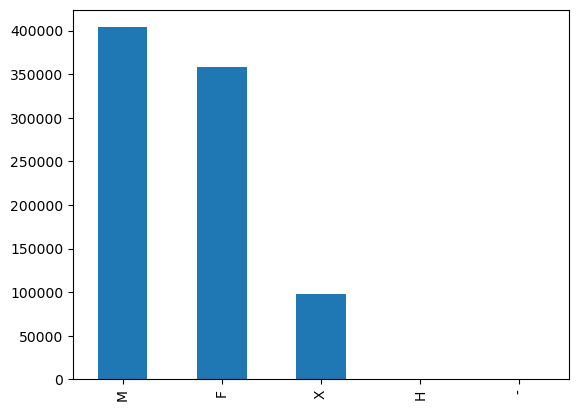

In [11]:
df['Vict Sex'].value_counts().plot(kind='bar');

In [12]:
# Check weapons used
df['Weapon Desc'].isnull().sum()

677744

In [13]:
# Laititudes and Longitudes
# Check those that should not be there: Min and max is the pointing point
print(df['LAT'].describe())

print("\n",df['LON'].describe())

count    1.004991e+06
mean     3.399821e+01
std      1.610713e+00
min      0.000000e+00
25%      3.401470e+01
50%      3.405890e+01
75%      3.416490e+01
max      3.433430e+01
Name: LAT, dtype: float64

 count    1.004991e+06
mean    -1.180909e+02
std      5.582386e+00
min     -1.186676e+02
25%     -1.184305e+02
50%     -1.183225e+02
75%     -1.182739e+02
max      0.000000e+00
Name: LON, dtype: float64


In [14]:
# Count zeros or extreme values
invalid_lat = df[(df['LAT'] == 0) | (df['LAT'] < -90) | (df['LAT'] > 90)].shape[0]
invalid_lon = df[(df['LON'] == 0) | (df['LON'] < -180) | (df['LON'] > 180)].shape[0]

print(f"Invalid LAT rows: {invalid_lat}")
print(f"Invalid LON rows: {invalid_lon}")

Invalid LAT rows: 2240
Invalid LON rows: 2240


In [15]:
# Check lat and Lon duplicates
duplicates = df.duplicated(subset=['LAT','LON','DATE OCC','TIME OCC']).sum()
print(f"Duplicate location entries: {duplicates}")

Duplicate location entries: 36323


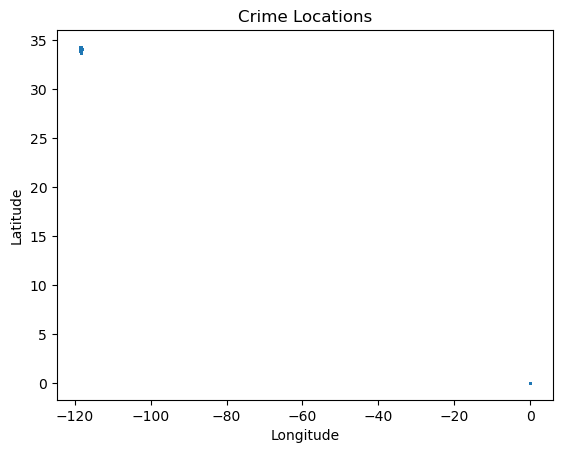

In [16]:
# Check for outliers
plt.scatter(
        df['LON'],
        df['LAT'],
        s=1,
        alpha=0.5
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Locations')
plt.show()

In [17]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Year'] = df['DATE OCC'].dt.year

year_counts = df['Year'].value_counts()
print(year_counts)

2022    235259
2023    232345
2021    209876
2020    199847
2024    127567
2025        97
Name: Year, dtype: int64


In [ ]:
# DATE OCC → converts to datetime

# TIME OCC → converts numeric times to HH:MM

# AREA NAME & Crm Cd Desc & Premis Desc → strips spaces, sets title case

# Vict Age → replaces negatives and >100 with NaN

# Vict Sex → standardizes all codes to 'M', 'F', 'X', 'Unknown'

# Weapon Desc → fills missing with 'No Weapon'

# LAT/LON → removes rows with invalid 0 coordinates, outliers

# Data Cleaning

In [18]:
columns_to_clean = [
    'DATE OCC',
    'TIME OCC',
    'AREA NAME',
    'Crm Cd Desc',
    'Vict Age',
    'Vict Sex',
    'Weapon Desc',
    'Premis Desc',
    'LAT',
    'LON'
]

for col in columns_to_clean:

    # Date cleaning from objecct to datetime
    if col == 'DATE OCC':
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Time object datatype to datetime
    elif col == 'TIME OCC':
        df[col] = df[col].astype(str).str.zfill(4)
        df[col] = pd.to_datetime(df[col], format='%H%M', errors='coerce').dt.time

    # Text white spaces and standardize Cases
    elif col in ['AREA NAME','Crm Cd Desc','Premis Desc']:
        df[col] = df[col].astype(str).str.strip().str.title()

    # Age cleaning to remove unrealistic ages such as bellow 0 years old
    elif col == 'Vict Age':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df.loc[(df[col] < 0) | (df[col] > 100), col] = np.nan

    # Gender sterdadize to only 4 that is unknown, Male, Female and others
    elif col == 'Vict Sex':
        df[col] = df['Vict Sex'].astype(str).str.strip()

        df['Vict Sex'] = df['Vict Sex'].replace(
            ['','-','H','U','nan','None'],
            'Unknown'
        )

    # Weapon column
    elif col == 'Weapon Desc':
        df[col] = df[col].fillna('No Weapon')

    # Latitude cleaning: this remove outliers such as 0 Lan and Lon and also to make the area fall in the study area
    elif col == 'LAT':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df.loc[(df[col] == 0) | (df[col] < -90) | (df[col] > 90), col] = np.nan

    elif col == 'LON':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df.loc[(df[col] == 0) | (df[col] < -180) | (df[col] > 180), col] = np.nan


# drop rows with missing coordinates
df = df.dropna(subset=['LAT','LON'], how='all')

Data cleaning was a crucial step in this project because the raw records from the Los Angeles Police Department dataset contained inconsistencies, missing values and invalid entries that could distort analysis. The process involved converting date columns into proper datetime format, handling missing values, removing or correcting negative and unrealistic victim ages, standardizing gender categories and also filtering invalid geographic coordinates such as zeros or outliers’ values. These steps ensured that crime incidents were correctly represented in both statistical analysis and geospatial visualizations of Los Angeles. By improving data quality, it made it possible to generate reliable insights, accurate charts and meaningful crime hotspot maps for the overall analysis.

# Visualize Clean Data

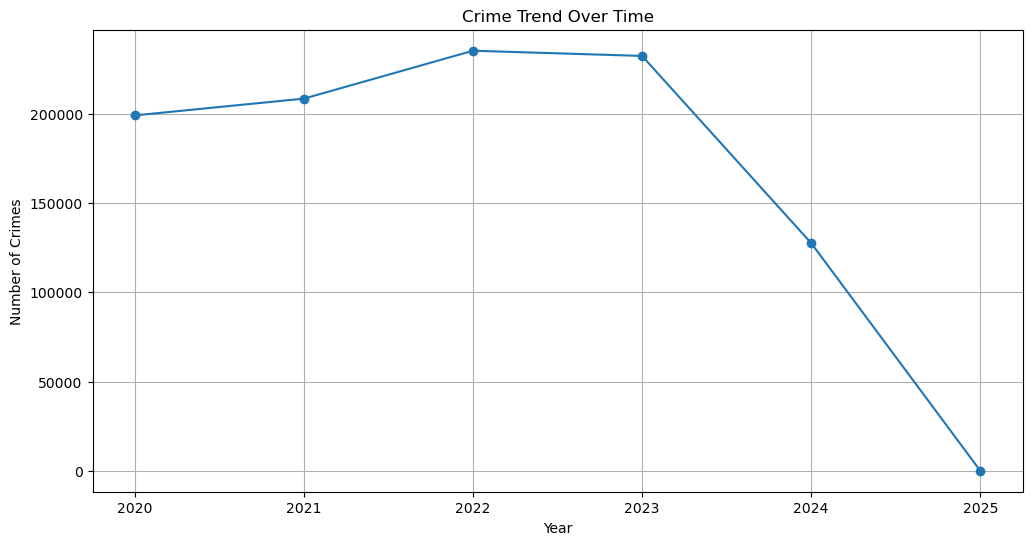

In [21]:
# extracting years from date occ column to be used in checking thrend per year
df['Year'] = df['DATE OCC'].dt.year

crime_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
                    
# plot line graph
crime_per_year.plot(
    kind='line',
    marker='o'
)

# Name the axis and the title of the line grpg
plt.title('Crime Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid()

plt.show()

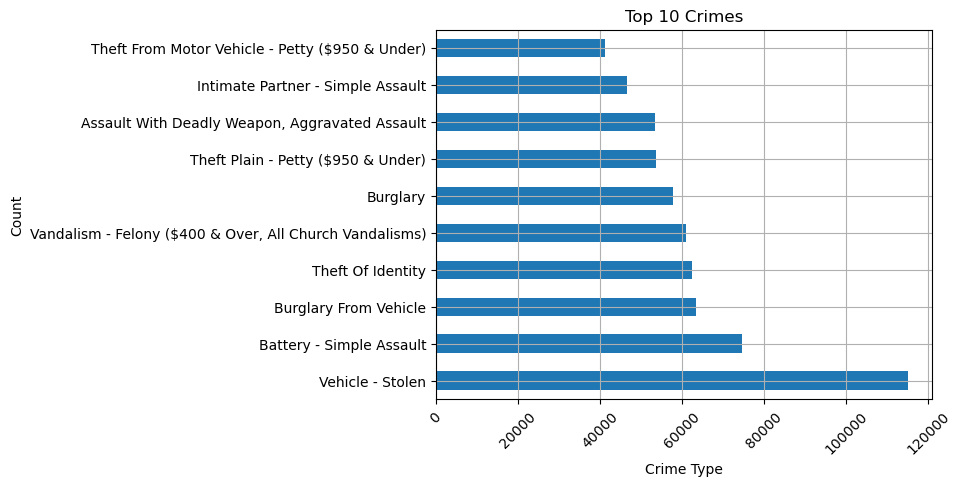

In [24]:
# Types of crime most reported
top_crimes = df['Crm Cd Desc'].value_counts().head(10)

top_crimes.plot(kind='barh')

plt.title('Top 10 Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.grid()
plt.xticks(rotation=45)
plt.show()

The analysis shows that vehicle theft is the most frequently reported crime in the dataset, indicating that car-related offenses are a major concern. This is followed by battery, which represents non-aggravated physical assaults. Other highly reported crimes include burglary from a vehicle, identity theft and vandalism, each recording more than 60,000 cases, highlighting common property and fraud-related offenses. In contrast, theft from a motor vehicle appears as the least reported category among the top ten crimes, although it still represents a significant number of incidents within the overall dataset.

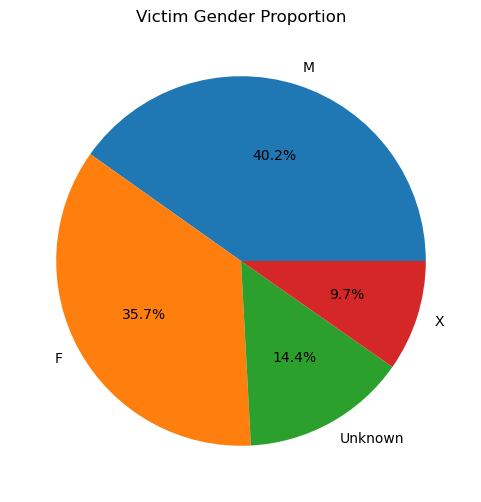

In [23]:
# Count the unique gender
gender_counts = df['Vict Sex'].value_counts()

plt.figure(figsize=(6,6))

# Plot pie parcentage
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%'
)

plt.title('Victim Gender Proportion')
plt.ylabel('')
plt.show()

The gender pie chart shows the distribution of victims recorded in the dataset. Male victims account for 40.2%, representing the largest portion of reported crimes follows by female making up 35.7%, which is slightly lower but still a significant portion. Unknown gender accounts for 14.4%, indicating cases where the victim’s gender was not recorded or available in the data closing the list are 9.7% are labelled as “X,” which typically represents unspecified. In conclusion, male are slightly more represented among victims, while a notable portion of records contains incomplete gender information.

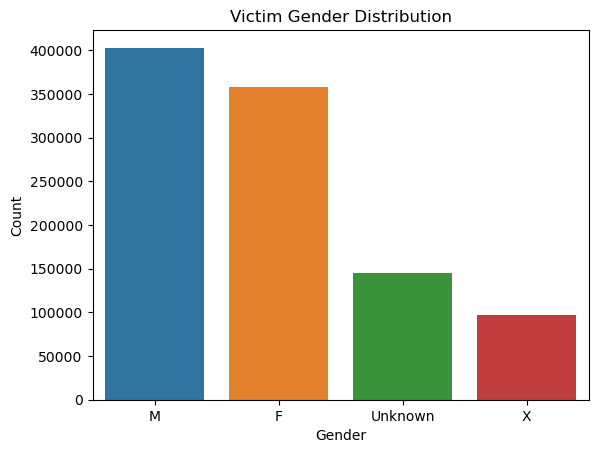

In [22]:
# Check distribution base on gender reported
sns.countplot(
    data=df,
    x='Vict Sex'
)

plt.title('Victim Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Male victims represent the largest proportion of reported cases in the dataset, followed by female victims. A notable share of records is categorized as unknown, indicating instances where gender information was not captured. The smallest proportion is labelled “X,” representing individuals who did not specify or whose gender was recorded as unspecified in the reporting system. The chart therefore shows that while most victims are identified as male or female, a meaningful portion of the data contains incomplete or unspecified gender information.

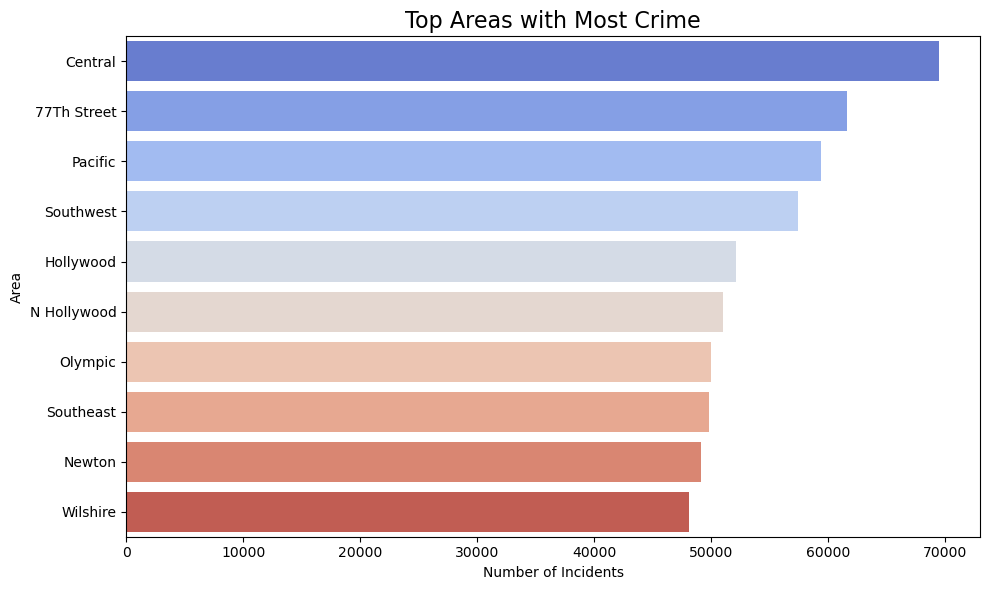

In [25]:
# Crime per area

area_counts = df['AREA NAME'].value_counts().head(10).reset_index()
area_counts.columns = ['Area', 'Incidents']

# Horizontal bar plot
plt.figure(figsize=(10,6))

sns.barplot(
    x='Incidents',
    y='Area',
    data=area_counts,
    palette='coolwarm'
)

plt.title('Top Areas with Most Crime', fontsize=16)
plt.xlabel('Number of Incidents')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

The analysis of the top 10 areas by reported crime shows that Central records the highest number of cases with approximately 70,000 cases. This is followed by 77th Street, which has around 65,000 reported crimes and Pacific closes the top three with highest crime cases, indicating a relatively high concentration of crime in these divisions. On the other hand, Wilshire has the lowest number of reported cases among the top ten areas, suggesting comparatively lower crime levels within this group, although it still ranks among the most affected areas overall.

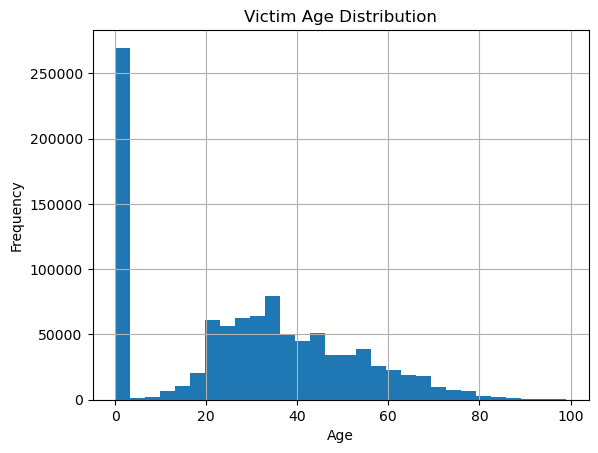

In [24]:
# Most affected age
df['Vict Age'].hist(bins=30)

plt.title('Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [25]:
# 

sample = df.dropna(subset=['LAT','LON']).sample(n=2000, random_state=42)

crime_map = folium.Map(location=[34.05, -118.25], zoom_start=10)

for _, row in sample.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=2
    ).add_to(crime_map)

crime_map

After cleaning the dataset and removing records with missing coordinates, a random sample of 2,000 incidents was selected for efficient visualization, revealing clusters and potential hotspots. The analysis helps highlight crime patterns that can support better planning and decision-making.

In [27]:
# create heat map
m = folium.Map(location=[34.05, -118.25], zoom_start=10)

# prepare heatmap data
heat_data = sample[['LAT','LON']]

# add heatmap
HeatMap(heat_data.values.tolist()).add_to(m)

m

The heat map visualizes the geographical concentration of crime incidents using the latitude and longitude in the dataset. Areas with warmer colors  that is red  indicate locations with a high density of crime reports, while cooler or lighter areas indicate fewer incidents. The heat map helps reveal spatial crime patterns across the city.

# Crime data trend

1. Per Year
2. Per month

In [27]:
# Extract Year from date occ column
df['Year'] = df['DATE OCC'].dt.year

# Count trends per year after extracting
crime_trend = df['Year'].value_counts().sort_index()
crime_trend

2020    199056
2021    208432
2022    235258
2023    232341
2024    127567
2025        97
Name: Year, dtype: int64

Checking data after extracting data 2025 shows a decline in cases reported

# Understanding why 2025 has fewer cases compared with the rest of the year

In [28]:
# Check the maximum year and the minimum this shows until when was the data collected is it full years or fewer
print("Max:", df['DATE OCC'].max())
print("Min:", df['DATE OCC'].min())

# Check wether their was missing dates during counting
print("Missing dates:", df['DATE OCC'].isna().sum())
print("")

# The whole years for data collection
print("Year:\n", df['Year'].value_counts().sort_index())

Max: 2025-05-29 00:00:00
Min: 2020-01-01 00:00:00
Missing dates: 0

Year:
 2020    199056
2021    208432
2022    235258
2023    232341
2024    127567
2025        97
Name: Year, dtype: int64


In [29]:
df.shape

(1002751, 29)

Checking data before cleaning and after cleaning size of the data reduce from 1004991 to 1002751.
nevertheless year 2025 data before cleaning and after renains 97 meaning this year was not affected by data cleaning

The only note is 2025 contains partial year data and therefore shows significantly 
fewer incidents compared to previous full years.

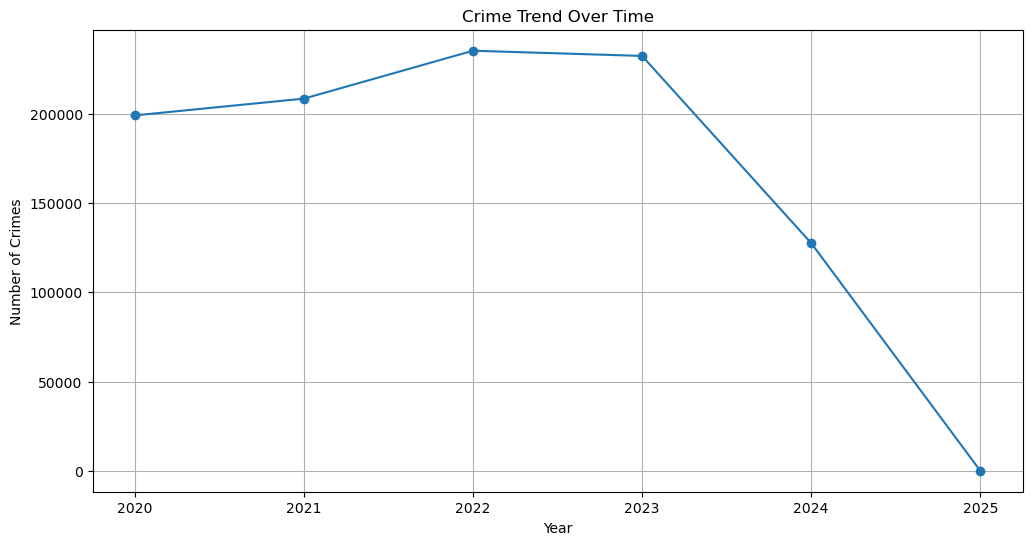

In [30]:
plt.figure(figsize=(12,6))

plt.plot(
    crime_trend.index,
    crime_trend.values,
    marker='o'
)

plt.title('Crime Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.grid(True)

plt.show()

Between 2020 and 2022, crime reports show a steady increase. The trend then stabilizes between 2022 and 2023, indicating little to no change in the number of reported cases. After 2023, the data shows a noticeable decline in crime reports across the remaining years. However, the sharp drop in 2025 is likely influenced by incomplete data for that year.

In [31]:
# Extract monthly crime from date occ column
df['Month'] = df['DATE OCC'].dt.to_period('M')

monthly_trend = df.groupby('Month').size()
monthly_trend.tail(10)

Month
2024-08    8324
2024-09    8309
2024-10    7817
2024-11    7179
2024-12    4697
2025-01      26
2025-02      44
2025-03      24
2025-04       1
2025-05       2
Freq: M, dtype: int64

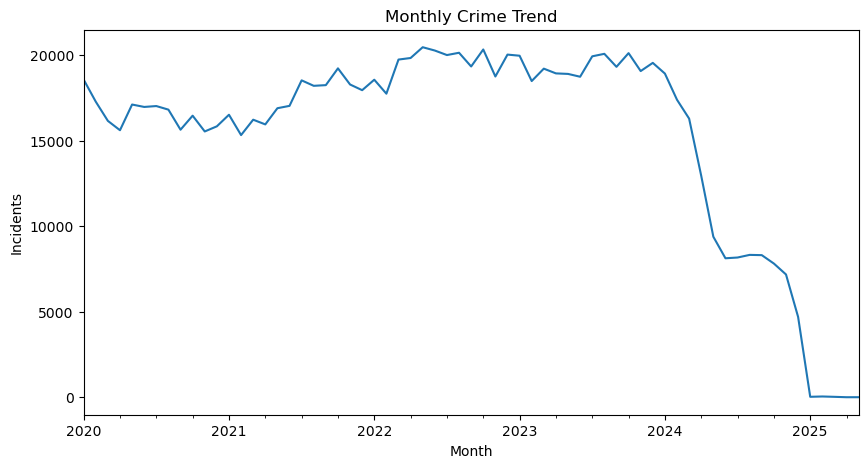

In [32]:
# Mothly crime
monthly_trend.plot(figsize=(10,5))

plt.title('Monthly Crime Trend')
plt.xlabel('Month')
plt.ylabel('Incidents')

plt.show()

To investigate the sharp decrease in reported crime between 2023 and 2025, I examined the dataset before and after cleaning. The total number of records was 1,004,991 before cleaning and 1,002,751 after cleaning, reflecting a reduction of 2,240 records.

To assess the impact of cleaning on individual years, I calculated the number of records removed per year:

2020: 791

2021: 1,444

2022: 1

2023: 4

2024: 0

2025: 0

This analysis indicates that data cleaning had minimal effect on the years 2022–2025, suggesting that the observed decrease in crime during this period is unlikely to be an artifact of the cleaning process.

# Conclusion

This project analysed crime data using Python, data analysis and geospatial visualization to understand crime patterns over time in Los Angelas and victim characteristics. Through data cleaning, transformation and visualization, clear trends emerged, including variations in crime frequency across years, crime types, victim per age and geographic areas.
The analysis showed that certain crimes such as vehicle-related theft and battery are among the most frequently reported, while some areas consistently record higher crime levels than others. Temporal analysis indicated a rise in crime reports between 2020 and 2022, stabilization around 2023 and a decline afterward, which may partly reflect incomplete recent data.
Spatial mapping further revealed clusters of crime incidents. This highlight potential hotspots within the city. These insights demonstrate how combining data science and geospatial analysis can support better understanding of crime distribution and assist decision-makers in planning targeted prevention and resource allocation strategies.
